# Problem 1. 

- Build undirected graph node by node and edge by edge, using NetworkX API.
- Determine and print the adjacency matrix of the graph using NetworkX API.
- Assign a different color to every node. Treat node color as its feature.
- Create node label (features) matrix as one hot encoded representations of node colors.
- Plot resulting graph, including node (numerical) labels and colors with the help of NetworkX API. 

In [1]:
import networkx as nx
import numpy as np
dir(nx)
print(nx.__version__)

3.2.1


In [51]:
#create directed graph and add nodes and edges
G = nx.DiGraph()

#Hex codes for colors if we draw graph
blue, orange, green, red = "#1f77b4", "#ff7f0e","#2ca02c", "#FF0000"

G.add_nodes_from([(1, {"color": blue}),
                  (2, {"color": orange}),
                  (3, {"color": red}),
                  (4, {"color": green})])

G.add_edges_from([(2, 1),(1, 4),(4, 2),(4, 3)])
A = np.asarray(nx.adjacency_matrix(G).todense())
print(A)

[[0 0 0 1]
 [1 0 0 0]
 [0 0 0 0]
 [0 1 1 0]]


In [52]:
mapping_dict = {green: 0, blue: 1, orange: 2, red:3}

In [53]:
#generate one hot encoding of node colors
def build_graph_color_label_representation(G,mapping_dict):
    one_hot_idxs = np.array([mapping_dict[v] for v in 
                             nx.get_node_attributes(G, 'color').values()])
    print(one_hot_idxs);
    one_hot_encoding = np.zeros((one_hot_idxs.size,len(mapping_dict)))
    one_hot_encoding[np.arange(one_hot_idxs.size),one_hot_idxs] = 1
    return one_hot_encoding

X = build_graph_color_label_representation(G, mapping_dict)
print(X)

[1 2 3 0]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [54]:
color_map = nx.get_node_attributes(G, 'color').values()
print("node attrbutes: ",nx.get_node_attributes(G, 'color'))
print("color_map: ", color_map)

node attrbutes:  {1: '#1f77b4', 2: '#ff7f0e', 3: '#FF0000', 4: '#2ca02c'}
color_map:  dict_values(['#1f77b4', '#ff7f0e', '#FF0000', '#2ca02c'])


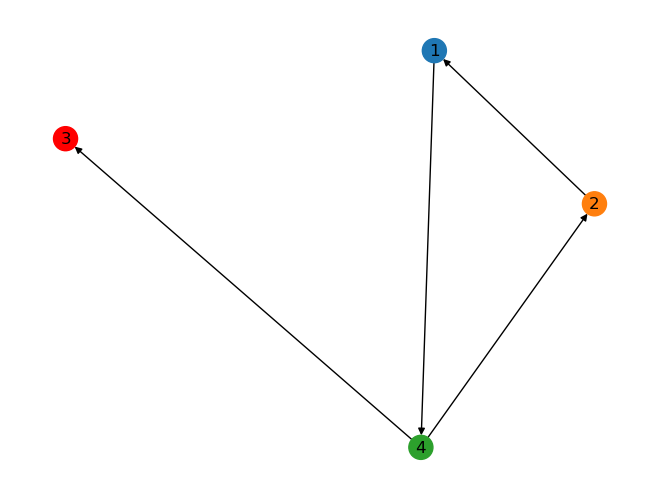

In [82]:
#draw the graph
nx.draw(G, with_labels=True, node_color=color_map)

# Problem 2

- Create a permutation matrix P that will permute nodes of the graph in Problem 1 from (1,2,3,4) to (3,2,4,1).
- That matrix is relabeling nodes.
- Express adjacency matrix for the permuted graph over the adjacency matrix for the original graph and the permutation matrix.
- Perform various matrix multiplications using torch API.
- Is the adjacency matrix of the permuted graph identical to the one in problem 1

In [24]:
import torch
import numpy as np

In [35]:
p = np.array([[0,0,1,0],
               [0,1,0,0],
               [0,0,0,1],
               [1,0,0,0]])

In [36]:
#create permutation matrix
P = torch.Tensor(a)
P

tensor([[0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.]])

In [37]:
#convert adjacency matrix to Torch tensor

a = torch.Tensor(A)
a

tensor([[0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 1., 1., 0.]])

In [38]:
#compute permuted adjacency matrix
B = torch.matmul(P,a)
B

tensor([[0., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 1., 0.],
        [0., 0., 0., 1.]])

In [44]:
#permute the one hot encoding matrix for node labels
x = torch.Tensor(X)

x = torch.matmul(P,x)
x

tensor([[0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]])

In [48]:
#create permuted graph

G1 = nx.DiGraph()

#Hex codes for colors if we draw graph
blue, orange, green, red = "#1f77b4", "#ff7f0e","#2ca02c", "#FF0000"

G1.add_nodes_from([(3, {"color": blue}),
                  (2, {"color": orange}),
                  (4, {"color": red}),
                  (1, {"color": green})])

G1.add_edges_from([(2, 3),(3, 1),(1, 2),(1, 4)])
A1 = np.asarray(nx.adjacency_matrix(G).todense())
print(A1)

[[0 0 0 1]
 [1 0 0 0]
 [0 0 0 0]
 [0 1 1 0]]


## We see above that the adjacency matrix is permutation invariant, as the adjacency matrix on the permuted graph is the same as the original graph

# Problem 3

- Assign weights {w_i= 〖(i-j)〗^2} to all edges {i,j} of the graph in Problem 1.
- Make that assignment using NetworkX API.
- Write function f() which calculates the average weight of nodes in the graph.
- Apply that function through NetworkX API.
- Record the average weight.
- Calculate the average weight of the permuted graph of Problem 2.
- What is the result?
- Is function f() permutation invariant or permutation equivariant.

In [71]:
#assign weights to edges of the graph G

for (u, v) in G.edges:
    G.edges[u,v]['weight'] = ((u-v)**2)
    print(f"({u}, {v})")

(1, 4)
(2, 1)
(4, 2)
(4, 3)


In [70]:
#show weights of edges of the graph G

for (u, v, w) in G.edges.data('weight'):
    print(f"({u}, {v}, {w})")

(1, 4, 9)
(2, 1, 1)
(4, 2, 4)
(4, 3, 1)


In [72]:
def f(G): #where G is a graph
    sum = 0
    count = 0
    for (u,v,w) in G.edges.data('weight'):
        sum += w
        count += 1
    avg = sum/count
    return avg

In [73]:
#calculate the average of the weights
avg = f(G)
print(avg)

3.75


In [77]:
#calculate avg weight for permuted graph

for (u, v) in G1.edges:
    G1.edges[u,v]['weight'] = ((u-v)**2)

for (u, v, w) in G1.edges.data('weight'):
    print(f"({u}, {v}, {w})")

(3, 1, 4)
(2, 3, 1)
(1, 2, 1)
(1, 4, 9)


In [78]:
#calculate avg weight of permuted graph
perm_avg = f(G1)
print(perm_avg)

3.75


## As we see above, the average edge weight is permutation invariant. Function f() is permutation invariant

# Problem 4

- Create six small graphs with 4,4,5, 6, and 6 nodes respectively.
- If you have any Chemistry training, assign different atoms to nodes in your graphs in some chemically meaningful manner.
- Possible atoms to use are C-carbon, O-Oxygen and N-Nitrogen. If you have no Chemistry training, just assign those letters to the nodes randomly.
- Do not use SMILES or the QM9 dataset presented in lecture. This is not meant to be that complicated, just an extension of the first example with colors.
- Develop a function that will create one-hot encoding for the identity of all atoms.
- Based on that function create node label matrices for all graphs. We treat the identity of every atom as the feature of that node.
- Generate adjacency matrices for all generated graphs.
- Instantiate simple Graph Convolutional Network model NodeNetwork as defined in the original notebook.
- Collate those graphs as a list into a single batch.
- As the target value (labels) `y` use 1 if a graph contains a Nitrogen and 0 if it does not.
- Our main objective is to organize those six graphs as a single torch.utils.data.Dataset and then pass that dataset to a loader of type torch.utils.data.DataLoader.
- When instantiating a  DataLoader use batch_size=2.
- Finally, you want to create a loop which will feed mini-batches from the loader into an instance of NodeNetwork.
- Please analyze the output of the forward pass through the network.
- You are not asked to train the network. You are demonstrating that you can feed a GNN with batches of graphs.

## See separate notebook for Problem 4